<a href="https://colab.research.google.com/github/andjelacurcic/colab/blob/main/Copy_of_Segmentacija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segmentacija fotografije**













Podela slike u smislene strukture, segmentacija slike, često je suštinski korak u analizi slike,
predstavljanju objekta, vizuelizaciji, kao i mnogim drugim zadacima tokom obrade slike. Cilj segmentacije je da
se pojednostavi i/ili promeni predstava slike u nešto što bi bilo smislenije i lakše za analizu. Tehnike za
segmentaciju lociraju objekte koji se sastoje od piksela koji imaju nešto zajedničko. Najčešće to znači da su
pikseli sa gotovo istim intenzitetom vrednosti grupisani zajedno, ili pikseli sa bojom istog koda. Ovaj rad daje
pregled nekih od tehnologija koje se koriste za segmentaciju različitih slika i istraživanje nedavnih tehnika
segmentacije. 



U sliku u generalnom smislu, mogu se svrstati
svi mediji koje mogu da vide ljudska bića, kao što su
nepokretna slika, video, animacija, grafika, crteži,
grafikoni, pa čak i tekst. Od slika, ljudska bića
dobiju većinu informacija iz stvarnog sveta. Da bi se
bolje doživele slike i dobilo više informacija od
zapažanja, razvijene su razne tehnike i otkrivene
mnoge aplikacije. U zavisnosti od načina dobijanja,
slike se mogu svrstati u različite tipove; takozvane
slike intenziteta svetlosti (vizuelne slike), slike
opsega ili dubine, slike magnetne rezonance,
termalne slike itd. Sve tehnike slike mogu da se
grupišu pod opštim okvirom – inženjeringom slike
(Image Engineering – IE), koji se sastoji od tri sloja:
procesiranja slike (Image Processing) – niži sloj,
analize slike (Image Analysis) – srednji sloj, i
razumevanja slike (Image Understanding) – visoki
sloj. Poslednjih godina, formiran je inženjering
slike kao nova disciplina i napravio veliki napredak.
Segmentacija slike je prvi korak, i jedan od
najkritičnijih zadataka analize slike. Ona ima za cilj
dobijanje informacija (predstavljenih podacima), iz
slike preko segmentacije slike (image Segmentation),
reprezentacije objekta (Object Representation) i
merenja odlike (Feature Measurement).
Segmentacija slike se često definiše kao proces
koji deli sliku na njene sastavne delove i izvlači
delove (objekte) od interesa. To je jedan od
najkritičnijih zadataka u automatskoj analizi slike, jer
će rezultati segmentacije uticati na sve naredne
procese analize slike, kao što su reprezentacija i opis
objekta, merenje odlika pa čak i zadataka višeg
nivoa, kao što su klasifikacija objekta i interpretacija
scene.
Analiza slike je grana računaske vizije koja se
bavi detekcijom semantičkih objekata na sceni. Tako
dobijene informacije moguće je iskoristiti za čitav niz
korisnih primena, na primjer; za analizu CT snimaka,
poboljšanje kompresije videa, pretragu baze filmskog
zapisa prema opisu scene, itd. U poslednjih nekoliko
godina raste interes za tehnologijom koja bi se
oslanjala na automatizovanu obradu velike količine multimedije. Međutim, uspešno izvlačenje
semantičkog sadržaja iz slike/videa, danas i dalje
predstavlja vrlo izazovan naučno-tehnički problem.
Kako bi razumeli značenje neke scene na slici koju
analiziramo, moramo razumeti osnovne komponente
scene i njihovu međusobnu relaciju. Uobičajen
postupak je razbijanje scene na semantičke objekte
koji predstavljaju regiju slike uparenu sa nekim
smislenim značenjem. Takvi objekti sastoje se od
regija slike uparenih sa meta-atributima koji ih
semantički opisuju (npr. skupu piksela koji pripadaju
automobilu dodeljen je semantički atribut
"automobil"). Svaki semantički objekat mora jasno
definisati vezu između objekta na slici i njegovih
realnih aspekata. Dakle, ključan korak u
razumijevanju slike je njena dekompozicija na
segmente, a upravo to je zadatak algoritama za
segmentaciju slike.

## DEFINICIJA SEGMENTACIJE`

Segmentacija ima za cilj klasterizaciju, odnosno
grupisanje, piksela u smislene regione na slici, tj.
regione koji odgovaraju pojedinim površinama na
slici, objektima ili delovima prirodnih objekata na
slici.
S obzirom na segmentaciju slike kao podelu
slike na skup nepreklapajućih regiona čija unija je
cela slika, neka pravila koja treba slediti za regione
koje proističu iz segmentacije slike mogu se izraziti
kao:
1. Potrebno je da budu uniformni i homogeni u
pogledu neke karakteristike;
2. Njihova unutrašnjost treba da bude
jednostavna i bez mnogo malih rupa;
3. Susedni regioni treba da imaju značajno
različite vrednosti u pogledu uniformnih
karakteristika;
4. Granice svakog segmenta treba da budu što
jednostavnije, glatke, i moraju biti prostorno
tačne.
Segmentaciju slike R možemo formalno da
definišemo kao razdvajanje na nepreklapajuće
regione Ri, gde su i = 1,2, .. n nesrazmerni neprazni
skupovi. Ako je P(Ri) indikator uniformnosti svih
emenata u skupu Ri, a ∅ prazan skup, onda važi:
1. ⋃ 𝑅𝑖 = 𝑅
𝑛
𝑖=1
2. Za svako i i j, za koje važi 𝑖 ≠ 𝑗, vredi
𝑅𝑖 ⋂ 𝑅𝑗 = ∅
3. Za svako i=1,2,..n, mora da važi 𝑃(𝑅𝑖
) = 1
4. Za sve parove 𝑖 ≠ 𝑗, važi 𝑃(𝑅𝑖 ∪ 𝑅𝑗) = 0
5. Za svako i=1,2,..n, 𝑅𝑖
je povezan region
(ovaj uslov nije neophodan i ponekad se
izostavlja)

U prethodnom, uslov (1) ističe da suma
segmentiranih regiona uključuje sve piksele na slici,
uslov (2) ističe da se različiti regioni segmentacije ne
smeju međusobno preklapati, uslov (3) ističe da
pikseli istih regiona segmentacije treba da imaju neke
slične osobine; uslov (4) ističe da pikseli koji
pripadaju različitim segmentiranim regionima imaju
neke različite osobine, i konačno, uslov (5) ističe da
su pikseli u istom segmentiranom regionu povezani.
Regione ili segmente je najlakše shvatiti i
interpretirati prilikom segmentacije mirnih sivih
(grayscale) slika, gde segmenti mogu biti oblasti
približno iste svetline na slici, koji zadovoljavaju
stavke iz prethodne formalne definicije. Nepomične 
26-3
sive slike se obično predstavljaju kao funkcija
koordinata, odnosno svetlina (nivo sivila) se
predstavlja kao funkcija koordinata f(x,y). Proširenje
2D na 3D slike se definiše preslikavanjem f(x,y) →
f(x,y,z), dok se proširenje mirnih na pokretne slike ili
nizove mirnih slika definiše presikavanjem f(x,y) →
f(x,y,t), dok je proširenje 2D na pokretne 3D slike
definisano preslikavanjem f(x,y) → f(x,y,z,t).
Uobičajen slučaj predstavlja proširenje mirnih sivih
slika na mirne kolor slike, koje se predstavlja
preslikavanjem f(x,y) → f(x,y). Najopštije, možemo
da definišemo proširenje mirnih sivih slika na
multidimenzionalne pokretne kolor slike ili nizove
mirnih kolor slika, pomoću sledećeg preslikavanja
f(x,y) → f(x,y,z,t). S obzirom na definicije proširenja
slika, potrebno je definisati i odgovarajuće proširenje
definicije segmentacije slika. Prilikom definisanja
prethodnih preslikavanja, regioni, odnosno segmenti i
svi uslovi treba da se prošire na višedimenzionalne
blobove4 (blobs), tako da se pomenutih pet uslova
mogu, i u ovako uopštenom slučaju, koristiti za
definisanje segmentacije slika. Prilikom proširenja
definisanog preslikavanjem f(x,y) → f(x,y,z), piksel
se zamenjuje vokselom, tj. osnovnim zapreminskim
elementom, dok za preslikavanja na više od tri
dimenzije, osnovni elemenat nije definisan. Prilikom
proširenja koja se definišu preslikavanjima koja
uključuju i vremensku komponentu, postoje dve
mogućnosti segmentacije, u prostornom i u
vremenskom domenu, pa se i proširenja definicije
treba izvršiti u skladu sa tim. Prilikom proširenja
definisanog presikavanjem f(x,y) → f(x,y,z,t),
karakterisitike elemenata slike postaju vektori i u
zavisnosti od definisanog presikavanja govorimo o
prostoru obeležja ili nekom drugom
višedimenzionalom prostoru.
Na osnovu prethodnog razmatranja, možemo da
zaključimo da je matematički stroga definicija
segmentacije neophodna za najprostiji slučaj, mirnih
sivih slika, dok se za sve ostale slučajeve definišu
neophodna proširenja. Iz tog razloga prilikom
izvođenja bilo kojih formulacija za segmentaciju, pod
pojmom slika možemo da podrazumevamo najopštije
slučajeve mirnih slika, pokretnih slika, kolor i sivih
slika, itd.

## Neke od metoda segmentacije: 


*   Segmentacija zasnovana na regionu
*   Segmentacija putem Thresholding Ots-u i Thresholding Riddler-Calvard
*   Segmentacija fotografija pomoću SOM-a
*   RandomWalk segmentacija pomoću scikit-image
*   Detekcija i segmentacija boje kože pomoću Gaussovog modela smeše
*   Segmentacija medicinske fotografije
*   Semantička segmentacija











# Učitavamo dataset

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=18_wYRTBTsoJ1mmqYLhwkpDLVTzBY-bVq' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=18_wYRTBTsoJ1mmqYLhwkpDLVTzBY-bVq" -O images.zip && rm -rf /tmp/cookies.txt

--2021-07-08 11:11:33--  https://docs.google.com/uc?export=download&confirm=Z8ZG&id=18_wYRTBTsoJ1mmqYLhwkpDLVTzBY-bVq
Resolving docs.google.com (docs.google.com)... 173.194.215.138, 173.194.215.139, 173.194.215.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.215.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-00-docs.googleusercontent.com/docs/securesc/02mkh53s9190h4et9en4avga6oq7ucue/h7sj1l8ps8fb510nhfag6qkajkqeoqmm/1625742675000/06049624160957438625/00881425446527295798Z/18_wYRTBTsoJ1mmqYLhwkpDLVTzBY-bVq?e=download [following]
--2021-07-08 11:11:33--  https://doc-14-00-docs.googleusercontent.com/docs/securesc/02mkh53s9190h4et9en4avga6oq7ucue/h7sj1l8ps8fb510nhfag6qkajkqeoqmm/1625742675000/06049624160957438625/00881425446527295798Z/18_wYRTBTsoJ1mmqYLhwkpDLVTzBY-bVq?e=download
Resolving doc-14-00-docs.googleusercontent.com (doc-14-00-docs.googleusercontent.com)... 108.177.13.132, 2607:f8b0:400c:c09::84
Connec

# Unzip dataset

In [ ]:
!unzip images.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/34_114_mask.tif   
  inflating: train/34_115.tif        
  inflating: train/34_115_mask.tif   
  inflating: train/34_116.tif        
  inflating: train/34_116_mask.tif   
  inflating: train/34_117.tif        
  inflating: train/34_117_mask.tif   
  inflating: train/34_118.tif        
  inflating: train/34_118_mask.tif   
  inflating: train/34_119.tif        
  inflating: train/34_119_mask.tif   
  inflating: train/34_11_mask.tif    
  inflating: train/34_12.tif         
  inflating: train/34_12_mask.tif    
  inflating: train/34_13.tif         
  inflating: train/34_13_mask.tif    
  inflating: train/34_14.tif         
  inflating: train/34_14_mask.tif    
  inflating: train/34_15.tif         
  inflating: train/34_15_mask.tif    
  inflating: train/34_16.tif         
  inflating: train/34_16_mask.tif    
  inflating: train/34_17.tif         
  inflating: train/34_17_mask.tif    
  inflating: train/34_18.tif         

Učitavamo neophodne modele i unzip-ujemo ih

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=10MhrHS8tm4mOQlQMghD8ygpLztPUihx9' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=10MhrHS8tm4mOQlQMghD8ygpLztPUihx9" -O models.zip && rm -rf /tmp/cookies.txt

--2021-07-08 11:26:45--  https://docs.google.com/uc?export=download&confirm=PSD9&id=10MhrHS8tm4mOQlQMghD8ygpLztPUihx9
Resolving docs.google.com (docs.google.com)... 173.194.216.139, 173.194.216.102, 173.194.216.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.216.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-7s-docs.googleusercontent.com/docs/securesc/2dmfmk8o5el6pc1e6gqbeilbkvf4iifu/7g65acugjc89l58le21lsf63ej7fprc8/1625743575000/07050430151874469418/09597144072876487780Z/10MhrHS8tm4mOQlQMghD8ygpLztPUihx9?e=download [following]
--2021-07-08 11:26:45--  https://doc-08-7s-docs.googleusercontent.com/docs/securesc/2dmfmk8o5el6pc1e6gqbeilbkvf4iifu/7g65acugjc89l58le21lsf63ej7fprc8/1625743575000/07050430151874469418/09597144072876487780Z/10MhrHS8tm4mOQlQMghD8ygpLztPUihx9?e=download
Resolving doc-08-7s-docs.googleusercontent.com (doc-08-7s-docs.googleusercontent.com)... 108.177.13.132, 2607:f8b0:400c:c09::84
Connec

In [ ]:
!unzip models.zip

Archive:  models.zip
   creating: models/
  inflating: models/fcn8s-heavy-pascal.prototxt  
  inflating: models/frozen_inference_graph.pb  
  inflating: models/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt  
  inflating: models/model.json       
  inflating: models/object_detection_classes_coco.txt  
  inflating: models/pascal-classes.txt  
  inflating: models/weights-core-best.h5  
  inflating: models/weights-ET-best.h5  
  inflating: models/weights-full-best.h5  


# Učitavamo neophodne biblioteke

In [ ]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-cp37-none-any.whl size=8595 sha256=8c2065689c5e1746430759105f5f67430f6afb8089b6febed5a47d35ff578fa1
  Stored in directory: /root/.cache/pip/wheels/de/a0/08/5234d6b02b29c561f62b6c985e2eb7d480fb0b92359a8c74e4
Successfully built minisom


In [ ]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 2.9MB/s 


In [ ]:
!pip install SimpleITK

     |████████████████████████████████| 47.4MB 58kB/s 


In [ ]:
!pip install imagecodecs

     |████████████████████████████████| 30.0MB 104kB/s 


In [ ]:
!pip install tifffile 

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1eFinAvhus6hLJQHLnKRoSasJhB3xxDlH' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1eFinAvhus6hLJQHLnKRoSasJhB3xxDlH" -O models.zip && rm -rf /tmp/cookies.txt

--2021-07-08 11:57:08--  https://docs.google.com/uc?export=download&confirm=&id=1eFinAvhus6hLJQHLnKRoSasJhB3xxDlH
Resolving docs.google.com (docs.google.com)... 173.194.216.138, 173.194.216.113, 173.194.216.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.216.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-54-docs.googleusercontent.com/docs/securesc/qajo8hidjvr6g86lttci26vbqr3593d7/vq5s05d533mogh1hu84suh13tp3i1lbr/1625745375000/07050430151874469418/00352592290795665335Z/1eFinAvhus6hLJQHLnKRoSasJhB3xxDlH?e=download [following]
--2021-07-08 11:57:08--  https://doc-08-54-docs.googleusercontent.com/docs/securesc/qajo8hidjvr6g86lttci26vbqr3593d7/vq5s05d533mogh1hu84suh13tp3i1lbr/1625745375000/07050430151874469418/00352592290795665335Z/1eFinAvhus6hLJQHLnKRoSasJhB3xxDlH?e=download
Resolving doc-08-54-docs.googleusercontent.com (doc-08-54-docs.googleusercontent.com)... 108.177.13.132, 2607:f8b0:400c:c09::84
Connecting

In [ ]:
!unzip models.zip

Archive:  models.zip
  inflating: models/imagenet_classes.txt  
  inflating: models/pose_deploy_linevec_faster_4_stages.prototxt  


In [ ]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 160815 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



# Segmentacija zasnovana na regionu

Za početak fokusiraćemo se na segmnetaciju fotografije zasnovanu na regionu (Region-based) za binarnu fotografiju pomoću morfološkog algoritma sliva (morphological watershed algorithm).

Grayscale fotografiju možemo smatrati topografskom površinom. Ako ovu površinu “poplavimo” od njenih minimalnih vrednosti i sprečimo spajanje voda iz različitih izvora, fotografija se zatim deli na dva različita skupa, naime slivne bazene (segmente) i slivove. Da bi se sprečila prekomerna segmentacija, koristi se unapred definisani skup markera i “poplava” površine započinje od ovih markera.


78 77


<Figure size 432x288 with 0 Axes>

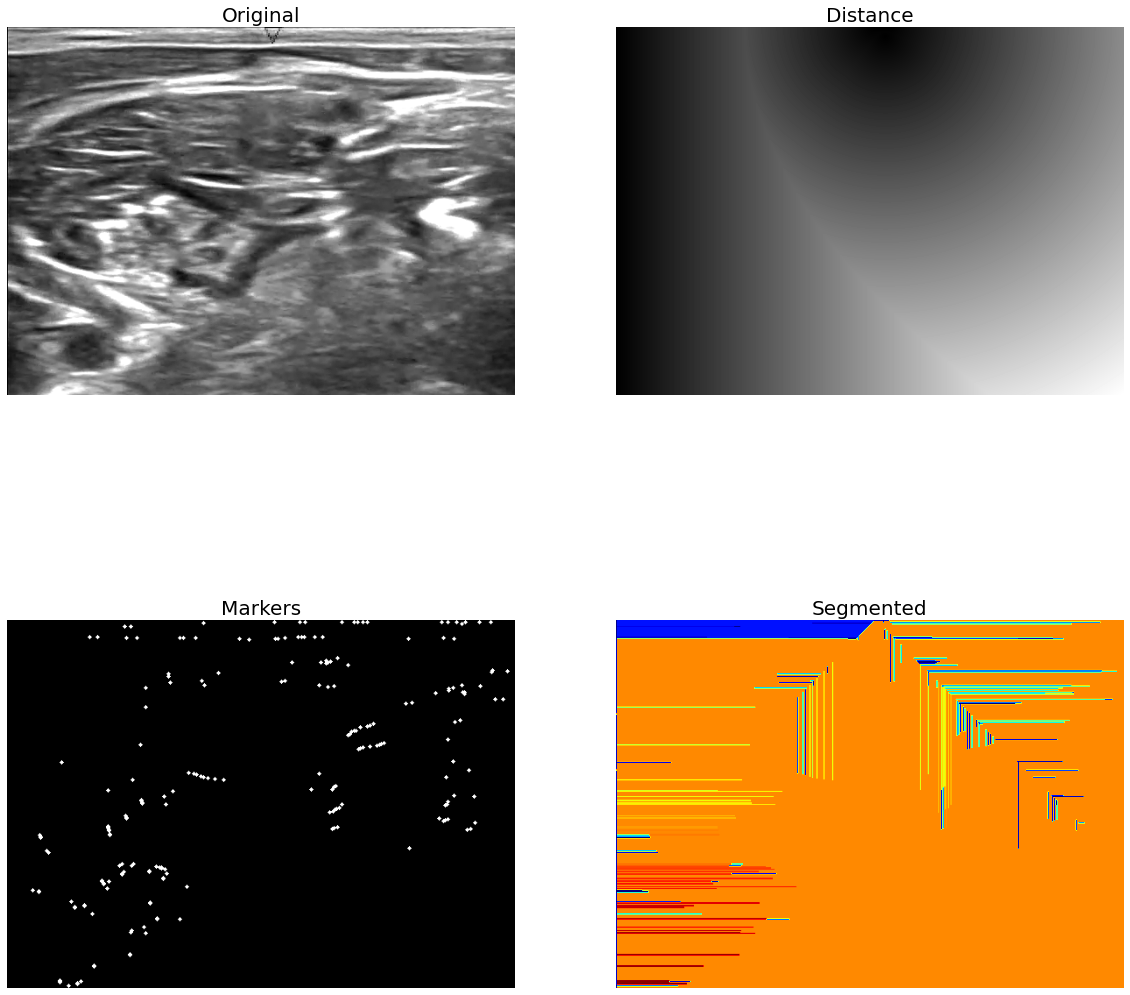

In [ ]:
from scipy import ndimage as ndi
from skimage.morphology import watershed, disk, binary_dilation, remove_small_objects
from skimage.filters import rank, threshold_otsu
from skimage.feature import peak_local_max
from skimage.measure import regionprops
from skimage.util import img_as_ubyte
from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt

# Prvo učitajte sliku ulaznih binarnih krugova koja vec ima sive nijanse u sebi

img = sitk.ReadImage('test/1000.tif', sitk.sitkFloat32)

# Izračunavamo Euklidsku transformaciju daljine i tražimo vrhove u njoj, označavajući ih naknadno da bismo ih koristili kao markere za watershed algoritam 
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=image)
markers = ndi.label(local_maxi)[0]

# Pokrećemo algoritam watershed sa kreiranim markerom da bismo dobili izlazne oznake segmentacije 
# Uklanjamo male objekte da bismo se oslobodili šuma
labels = watershed(-distance, markers, mask=image)
labels = remove_small_objects(labels, min_size=100)

# Izračunavamo broj segmentiranih objekata (labela) u izlazu i broj jedinstvenih klasa (labela):
props = regionprops(labels)
print(len(np.unique(labels)), len(props))

plt.gray()
plt.figure(figsize=(20,20))
plt.subplot(221), plt.imshow(image), plt.axis('off'), plt.title('Original', size=20)
plt.subplot(222), plt.imshow(distance), plt.axis('off'), plt.title('Distance', size=20)
plt.subplot(223), plt.imshow(binary_dilation(markers, disk(2))), plt.axis('off'), plt.title('Markers', size=20)
plt.subplot(224), plt.imshow(labels, cmap='jet'), plt.axis('off'), plt.title('Segmented', size=20)
plt.show()

# Segmentation by Thresholding with Otsu and Riddler-Calvard // Segmentacija putem Thresholding Ots-u i Thresholding Riddler-Calvard

Thresholding se odnosi na porodicu algoritama koji koriste vrednost piksela kao prag za stvaranje binarne fotografije (fotografija sa samo crno-belim pikselima) od fotografije u sivim tonovima (ovo je najjednostavniji mogući metod, segmentiranje objekata u prvom planu iz pozadine na fotografiji).

Prag se može odabrati ručno (gledanjem histograma vrednosti piksela) ili automatski pomoću algoritma. Tehnike segmentacije fotografije mogu biti nekontekstualne (bez razmatranja prostornih odnosa između obeležja na fotografiji i grupisanja piksela samo s obzirom na određene globalne atribute - na primer, nivo boje/sive boje) ili kontekstualne (dodatno iskorišćavanje prostornih odnosa).

Prikazaćemo nekoliko popularnih metoda graničenja zasnovanih na histogramu poznatih kao Otsu-ove (uz pretpostavku bimodalnog histograma) i Riddler-Calvardove metode koristeći funkcije biblioteke mahotas.

Koristeći Otsu metodu, za svaku moguću vrednost praga izračunava se ponderisana varijansa unutar klase između dve klase piksela (odvojena tom vrednošću praga). Optimalni prag je onaj koji minimalizuje ovu varijansu.

**Riddler-Calvard** metoda automatski bira (optimalni) prag kao rezultat iterativnog procesa koji obezbeđuje postupno čistije izdvajanje područja objekta nakon niza ponavljanja.

Thresholding funkcije imaju trivijalni interfejs u ​​mahotas biblioteci: uzimaju fotografiju i vraćaju vrednost.

Funkcija otsu() je korišćena za izračunavanje optimalnog Ots-u praga za ulaznu fotografiju.
Funkcija rc() je korišćena za izračunavanje praga Riddler-Calvard za datu ulaznu fotografiju.
Svim pikselima čija je vrednost manja ili jednaka optimalnom pragu dodeljuje se vrednost nula (crni objekat u prvom planu), a onima sa vrednostima iznad njega dodeljuje se vrednost jedan (bela pozadina), da bi se dobila izlazna binarna fotografija za svaki od dva algoritma.


126 126.66970789705297


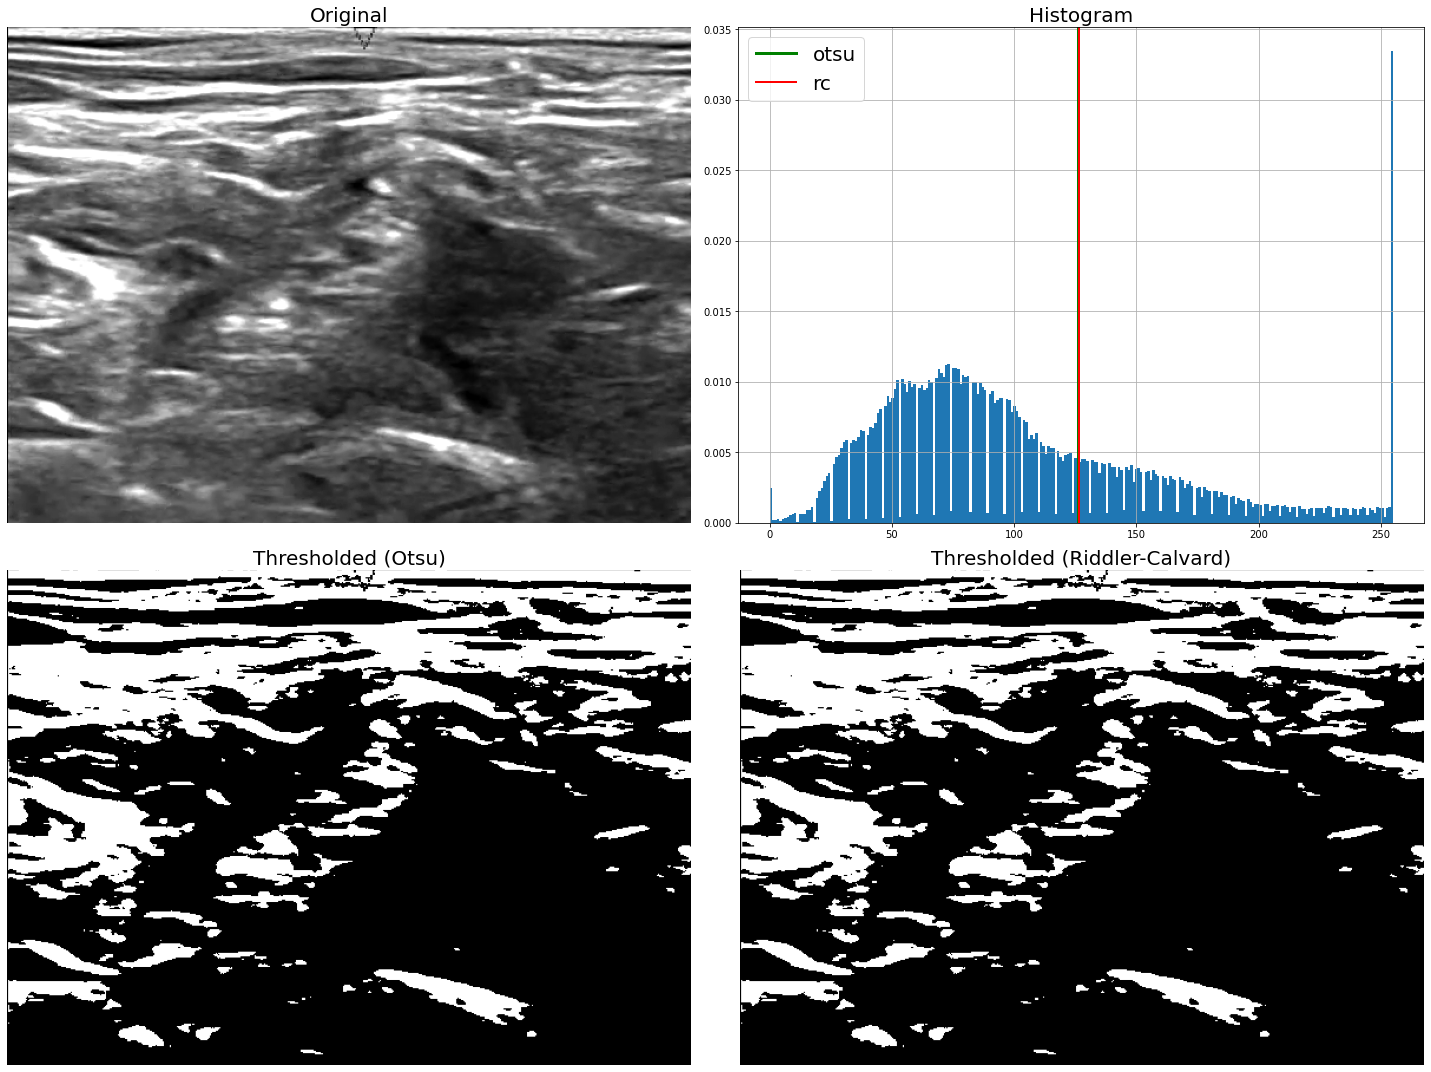

In [ ]:
%matplotlib inline
import mahotas as mh
import numpy as np
import matplotlib.pylab as plt


#Prvo učitavamo fotografiju i koristitimo funkcije biblioteke mahotas da bismo dobili optimalne pragove 
#za ulaznu fotografiju sive skale.
#Pragovi dobijeni sa dva gore navedena algoritma prilično su blizu jedan drugom za datu ulaznu fotografiju

image = mh.imread('test/1006.tif')
thresh_otsu, thresh_rc = mh.otsu(image), mh.rc(image)
print(thresh_otsu, thresh_rc) # 161 161.5062276206947


#Izvršimo binarnu segmentaciju ulazne fotografije koristeći optimalne pragove dobijene za vrednosti piksela. 
#Dobićemo dve različite binarne izlazne fotografije, koje odgovaraju algoritmima:

binary_otsu, binary_rc = image > thresh_otsu, image > thresh_rc


#Crtamo ulaznu fotografiju, histogram ulazne fotografije i izračunavamo pragove i izlazne fotografije:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
axes = axes.ravel()
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original', size=20), axes[0].axis('off')
axes[1].hist(image.ravel(), bins=256, density=True)
axes[1].set_title('Histogram', size=20)
axes[1].axvline(thresh_otsu, label='otsu', color='green', lw=3), axes[1].axvline(thresh_rc, label='rc', color='red', lw=2)
axes[1].legend(loc='upper left', prop={'size': 20}), axes[1].grid()
axes[2].imshow(binary_otsu, cmap=plt.cm.gray)
axes[2].set_title('Thresholded (Otsu)', size=20), axes[2].axis('off')
axes[3].imshow(binary_rc, cmap=plt.cm.gray)
axes[3].set_title('Thresholded (Riddler-Calvard)', size=20), axes[3].axis('off')
plt.tight_layout()
plt.show()

# Medical Image Segmentation // Segmentacija medicinske fotografije

Segmentacija medicinske fotografije ima za cilj otkrivanje granica koje razdvajaju različite objekte od pozadine unutar dvodimenzionalne ili trodimenzionalne medicinske fotografije.

Medicinske fotografije su vrlo promenljive prirode, a to otežava njihovu segmentaciju. Varijacije nastaju zbog glavnih načina variranja u anatomiji čoveka i zbog različitih modaliteta fotografija koje se segmentiraju (na primer, rendgen, MRI, CT, mikroskopija, endoskopija, OCT i tako dalje) koji se koriste za dobijanje medicinskih fotografija. Dalji dijagnostički uvid može se dobiti iz rezultata segmentacije kako bi se lekarima pomoglo u donošenju odluka. Regioni kojima nedostaju ivice, odsustvo kontrasta teksture i tako dalje stvaraju glavne probleme, a predloženi su mnogi pristupi segmentaciji da bi se oni popravili. Automatsko merenje organa, brojanje ćelija i simulacije na osnovu izvučenih graničnih informacija neke su primene medicinske segmentacije.



# Watershed Segmentation

Klasa MorphologicalWatershedFromMarkers iz SimpleITK modula koristi se za primenu segmentacije sliva sa morfološkim operatorima.

Pikseli sa slivom označavaju se sa 0. Oznake izlaznih fotografija preuređene su na način da oznake objekta postaju uzastopne. Zatim se ti objekti sortiraju u odnosu na veličinu predmeta pomoću RelabelComponent filtera fotografije.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


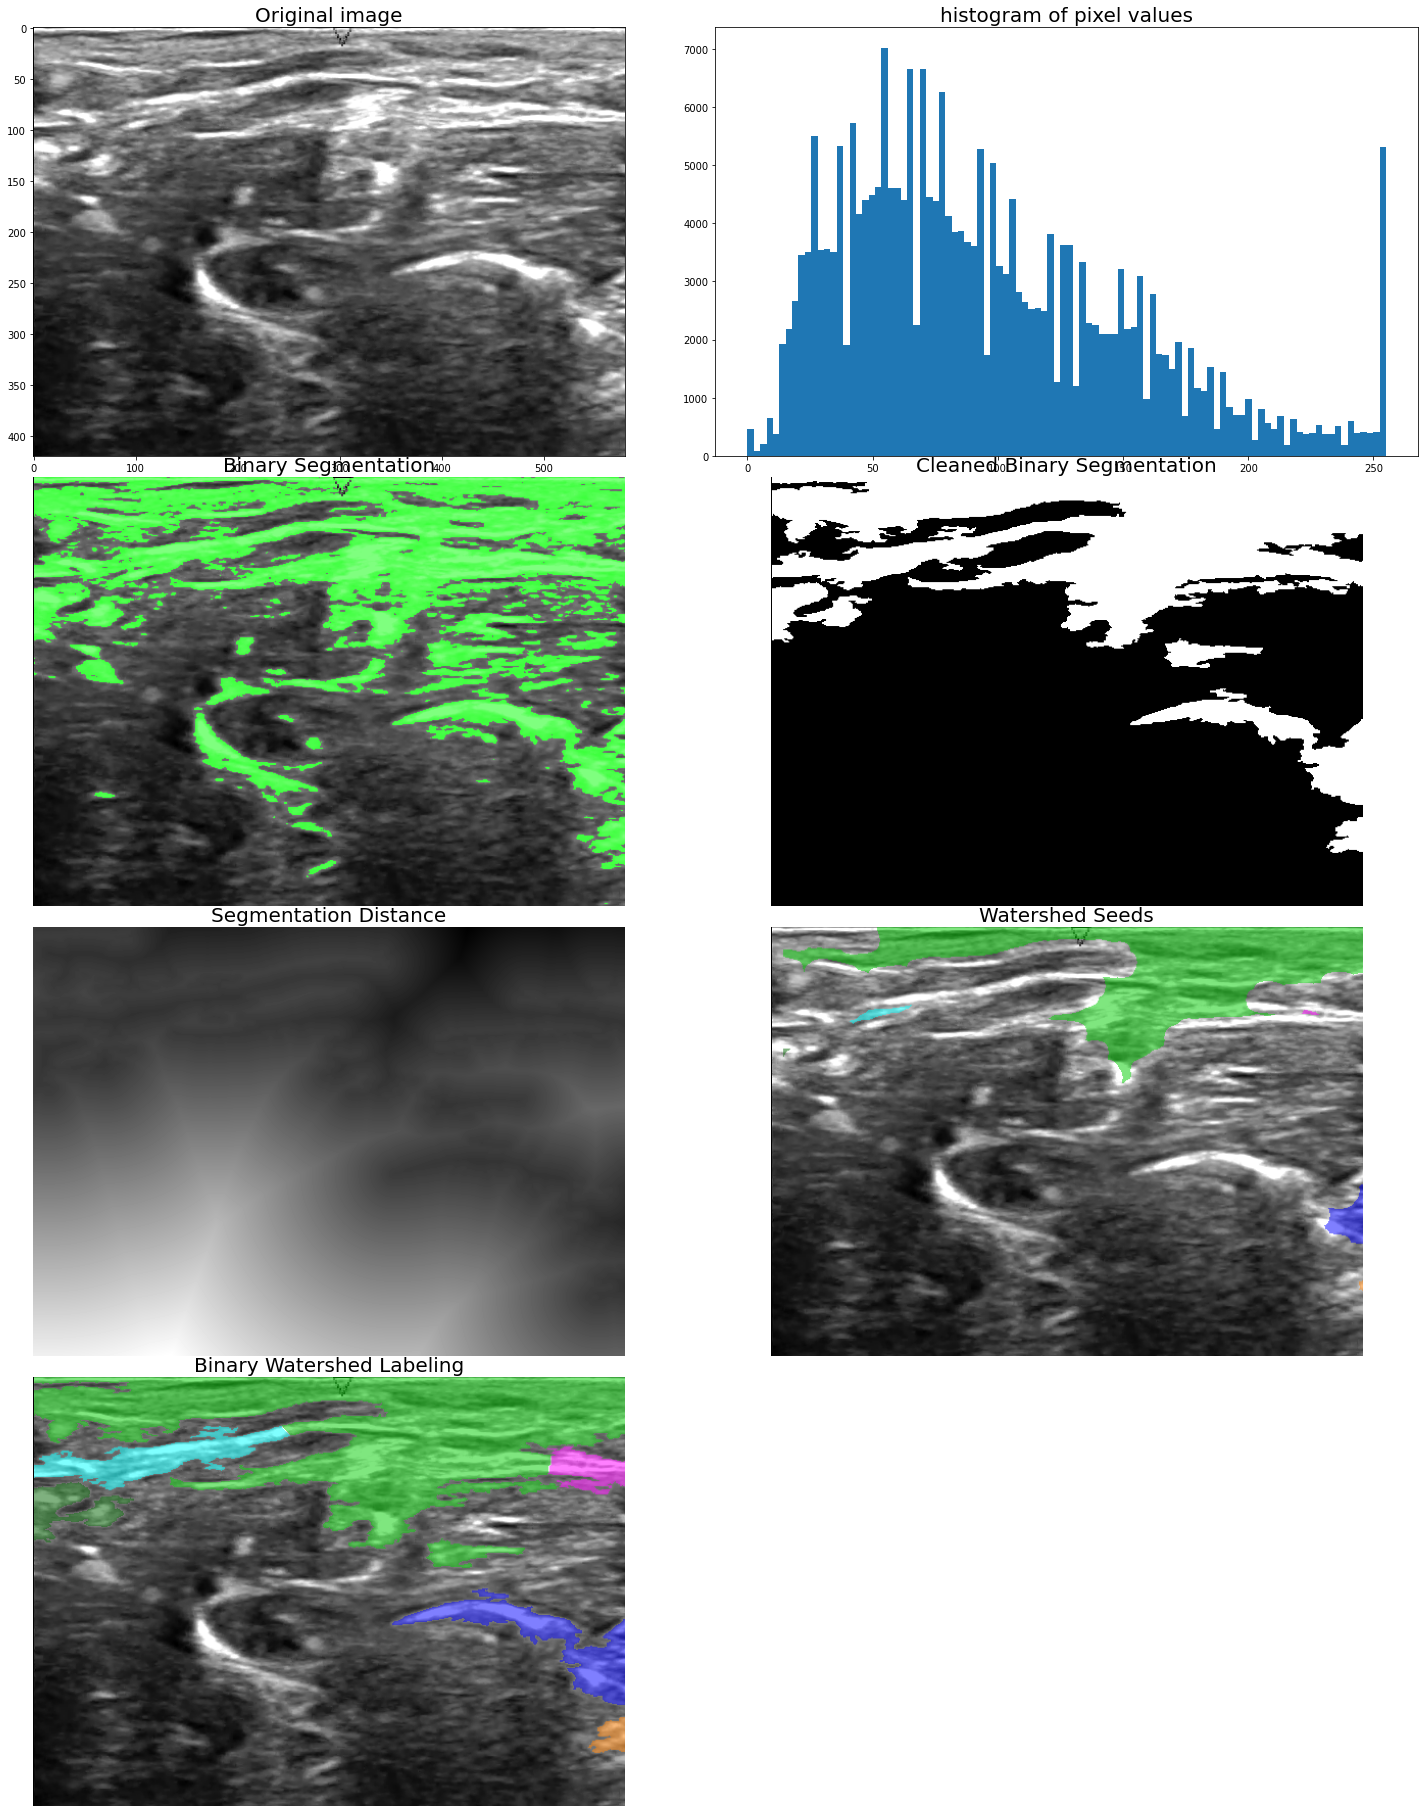

In [ ]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pylab as plt


U#čitavamo fotografiju i odvojamo prvi plan  od pozadine pomoću praga sa ručno izabranim pragom. 
#Koristimo morfološko otvaranje i zatvaranje da bismo se rešili malih komponenata/rupa.

img = sitk.ReadImage('test/148.tif', sitk.sitkFloat32)
f = sitk.RescaleIntensityImageFilter()

img = f.Execute(img)
plt.figure(figsize=(20,26))
plt.gray()
plt.subplots_adjust(0,0,1,0.95,0.05,0.05), plt.axis('off')
plt.subplot(421), plt.imshow(sitk.GetArrayFromImage(img)), plt.title('Original image', size=20)
plt.subplot(422), plt.hist(sitk.GetArrayViewFromImage(img).flatten(), bins=100), plt.title('histogram of pixel values', size=20)
thresh_value = 120
thresh_img = img>thresh_value
plt.subplot(423), plt.imshow(sitk.GetArrayFromImage(sitk.LabelOverlay(img, thresh_img))/255), plt.title('Binary Segmentation', size=20), plt.axis('off')
cleaned_thresh_img = sitk.BinaryOpeningByReconstruction(thresh_img, [10, 10, 10])
cleaned_thresh_img = sitk.BinaryClosingByReconstruction(cleaned_thresh_img, [10, 10, 10])

plt.subplot(424), plt.imshow(sitk.GetArrayFromImage(cleaned_thresh_img)), plt.title('Cleaned Binary Segmentation', size=20), plt.axis('off')


#Izračunavamo mapu udaljenosti.Seme na rastojanju ≥ 10 od granice predmeta označeno je kao jedinstveno.
#Ponovo označimo semenske objekte pomoću uzastopnih oznaka objekata dok uklanjamo sve objekte veličine ≤ 15 piksela.

dist_img = sitk.SignedMaurerDistanceMap(cleaned_thresh_img != 0, insideIsPositive=False, squaredDistance=False, useImageSpacing=False)
radius = 10
seeds = sitk.ConnectedComponent(dist_img < -radius)
seeds = sitk.RelabelComponent(seeds, minimumObjectSize=15)

# Pokrećemo algoritam watershed segmentacije na izračunatoj mapi udaljenosti, sa semenima kao markerima
ws = sitk.MorphologicalWatershedFromMarkers(dist_img, seeds, markWatershedLine=True)
ws = sitk.Mask( ws, sitk.Cast(cleaned_thresh_img, ws.GetPixelID()))
img = sitk.Cast(img, sitk.sitkUInt8)
plt.subplot(425), plt.imshow(sitk.GetArrayFromImage(dist_img)), plt.title('Segmentation Distance', size=20), plt.axis('off')
plt.subplot(426), plt.imshow(sitk.GetArrayFromImage(sitk.LabelOverlay(img, seeds))), plt.title('Watershed Seeds', size=20), plt.axis('off')
plt.subplot(427), plt.imshow(sitk.GetArrayFromImage(sitk.LabelOverlay(img, ws))), plt.title('Binary Watershed Labeling', size=20), plt.axis('off')
plt.show()

# Zaključak

Istraživanje segmentacije slike počelo je sa
razvojem tehnika za segmentaciju slika. Međutim, još
uvek ne postoji opšta teorija za segmentaciju slike.
Dakle, ovaj razvoj je tradicionalno bio ad-hoc proces. Kao rezultat toga, mnogi istraživački pravci su
eksploatisani, usvojeni su neki veoma različiti
principi pa se pojavio i širok spektar algoritama
segmentacije u literaturi. Primećeno je od strane
mnogih da se ni jedan od razvijenih algoritama za
segmentaciju generalno ne može primeniti na sve
slike i različiti algoritmi nisu podjednako pogodni za
pojedine aplikacije. Sa povećanjem broja algoritama
za segmentaciju slike, vrednovanje performansi ovih
algoritama postaje neophodno u proučavanju
segmentacije. S obzirom na različite modalitete za
dobijanje različitih slika i veliki broj aplikacija koje
koriste segmentaciju slike, izbor odgovarajućih
algoritama postaje važan zadatak. 
Kao što je slučaj sa ovim datasetom, nisu mogli svi algoritmi biti iskorišćeni, već samo neki. 

### **Pokušaji

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


trilobite 66.68669891357422


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth



trilobite 15.836787223815918


Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth



trilobite 68.56151580810547


Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth



grey_whale 47.9702262878418


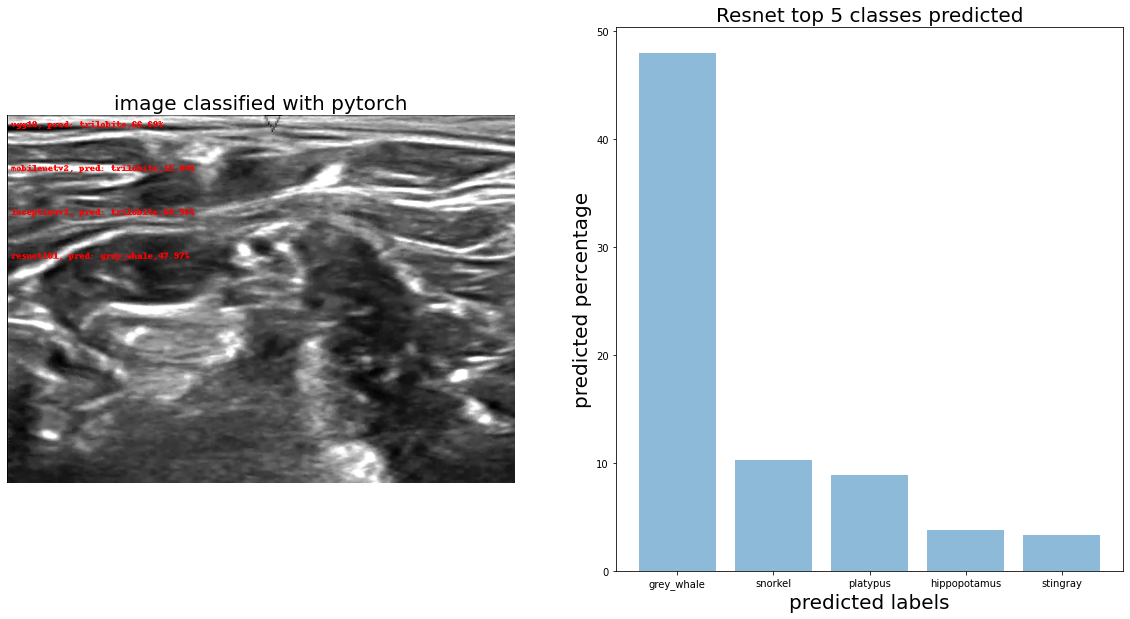

otter 16.91012954711914
platypus 11.154858589172363
platypus 9.332983016967773
platypus 31.172809600830078


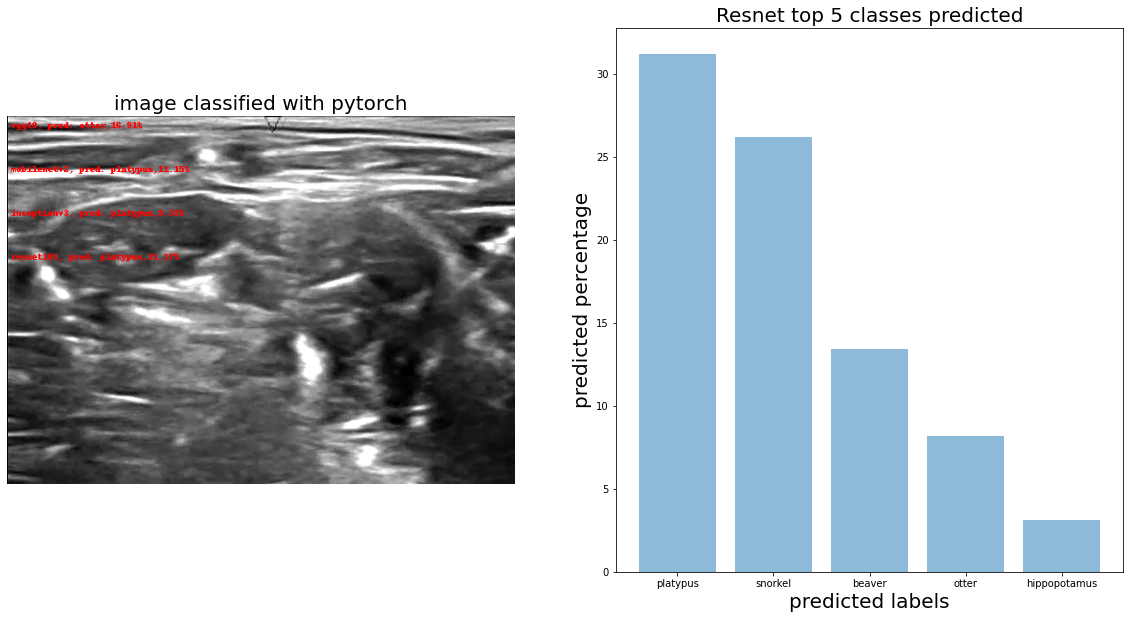

In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pylab as plt


 #ulazna fotografiju i prethodno obučeni model (na ImageNet-u), 

def classify(img, model_index, model_name, model_pred, labels):
    #print(model_name, model_pred.shape)
    _, index = torch.max(model_pred, 1)
    model_pred, indices = torch.sort(model_pred, dim=1, descending=True)
    percentage = torch.nn.functional.softmax(model_pred, dim=1)[0] * 100
    print(labels[index[0]], percentage[0].item())
    draw = ImageDraw.Draw(img)
    font = ImageFont.load_default()
    draw.text((5, 5+model_index*50),'{}, pred: {},{}%'.format(model_name, labels[index[0]], round(percentage[0].item(),2)),(255,0,0),font=font)
    return indices, percentage
    
 #Pročitajte klase ImageNet (postoji 1000 klasa) i dostupni modeli u torchvisionu.
with open('models/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
# print(dir(models))


# transformacija koje se primenjuju na ulaznu fotografiju kao korak predobrade 
#(npr. promena veličine, centriranje i , z-rezultat normalizovanje transformacije, a zatim pretvaranje fotografiju u tenzor).

transform = transforms.Compose([            
 transforms.Resize(256),                    
 transforms.CenterCrop(224),                
 transforms.ToTensor(),                     
 transforms.Normalize(                      
 mean=[0.485, 0.456, 0.406],                
 std=[0.229, 0.224, 0.225]                  
 )])


## ulazne fotografije koje treba klasifikovati pomoću prethodno obučenih dubokih neuronskih mreža. 
#Primena na fotografije prethodno definisanu transformaciju pretprocesiranja.#

for imgfile in ["train/10_104.tif","train/10_106.tif"]:
    
    img = Image.open(imgfile).convert('RGB')
    img_t = transform(img)
    batch_t = torch.unsqueeze(img_t, 0)

 
    #Instanciranje nekoliko prethodno obučenih (sa ImageNet težinama) poznatih modela dubokog učenja 
    #(npr. VGG16, MobileNetV2, InceptionV3 i ResNet101). 
    # prosleđivanje ulazne fotografije i predviđanje 
    #(zajedno sa vrednostima verovatnoće koje odgovaraju svakoj od 1000 klasa u ImageNet-u) za verovatnu klasu fotografije.
  
    vgg19 = models.vgg19(pretrained=True)
    vgg19.eval()
    pred = vgg19(batch_t)
    classify(img, 0, 'vgg19', pred, labels)

    mobilenetv2 = models.mobilenet_v2(pretrained=True)
    mobilenetv2.eval()
    pred = mobilenetv2(batch_t)
    classify(img, 1, 'mobilenetv2', pred, labels)

    inceptionv3 = models.inception_v3(pretrained=True)
    inceptionv3.eval()
    pred = inceptionv3(batch_t)
    classify(img, 2, 'inceptionv3', pred, labels)

    resnet101 = models.resnet101(pretrained=True)
    resnet101.eval()
    pred = resnet101(batch_t)
    indices, percentages = classify(img, 3, 'resnet101', pred, labels)
    
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img), plt.axis('off'), plt.title('image classified with pytorch', size=20)
    plt.subplot(122), plt.bar(range(5), percentages.detach().numpy()[:5], align='center', alpha=0.5)
    #print(indices[0].detach().numpy()[:5])
    plt.xticks(range(5),  np.array(labels)[indices.detach().numpy().astype(int)[0][:5]])
    plt.xlabel('predicted labels', size=20), plt.ylabel('predicted percentage', size=20)
    plt.title('Resnet top 5 classes predicted', size=20)
    plt.show()

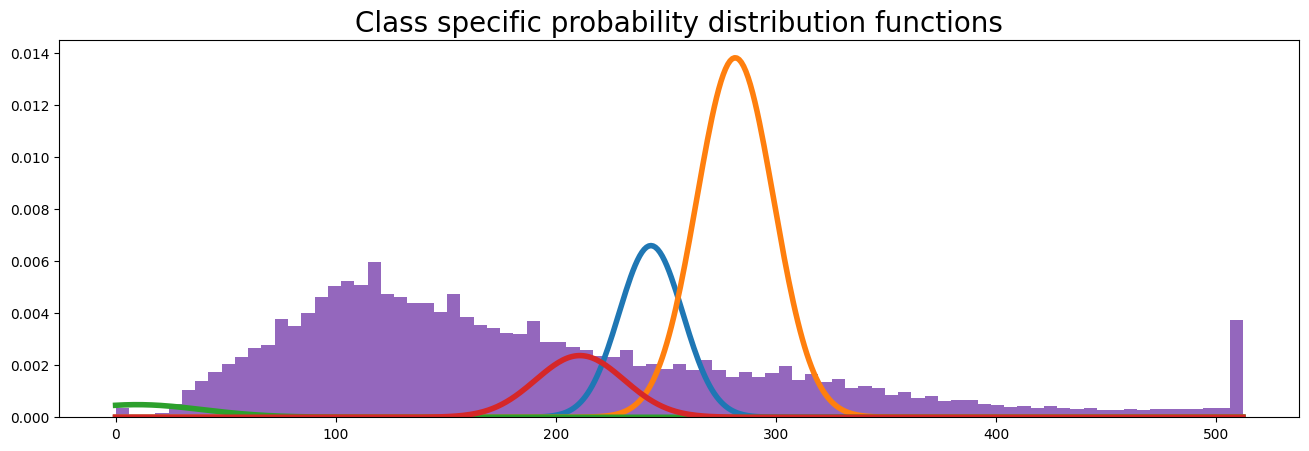

(500,) (500, 4)


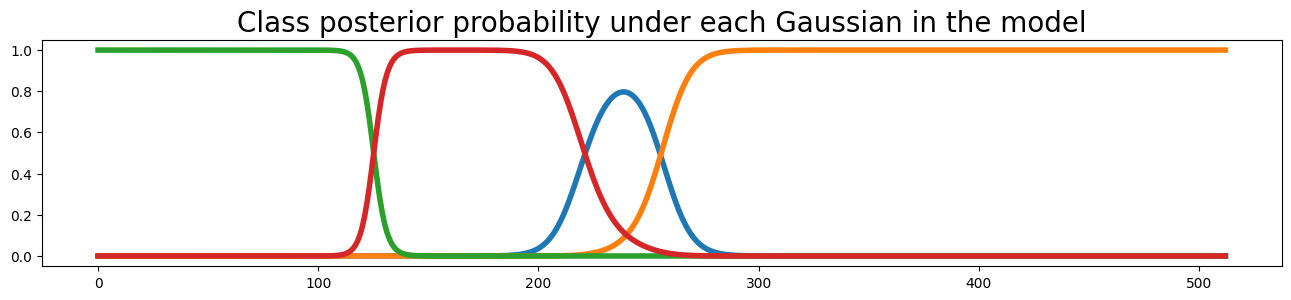

TypeError: ignored

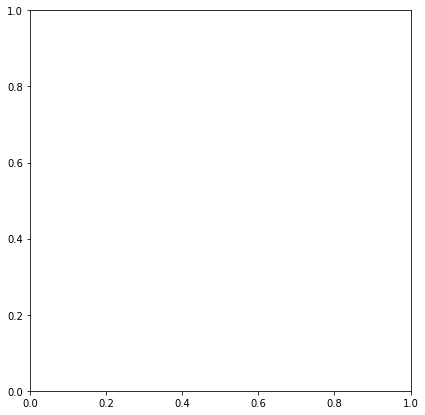

In [ ]:

import SimpleITK as sitk
import numpy as np
import matplotlib.pylab as plt
#import matplotlib.mlab as mlab
import scipy.stats as scs
from sklearn.mixture import GaussianMixture

max_int_val = 512;
image = sitk.ReadImage("test/105.tif", sitk.sitkFloat32)
image = sitk.RescaleIntensity(image,0.0,max_int_val)
image_data = sitk.GetArrayFromImage(image);

# parametri za model Gaussove smeše
np.random.seed(1)
g = GaussianMixture(n_components=4, covariance_type='diag', tol=0.01, max_iter=100, 
                n_init=1, init_params='kmeans')

# Procena parametra modela algoritmom očekivanja-maksimizacije (EM)
g.fit(image_data[0].flatten().reshape(-1, 1)) 

# pdf svakog Gausovog modela
def plot_pdf_models(x, g):
    we = g.weights_
    mu = g.means_
    si = np.sqrt(g.covariances_)
    for ind in range(0,we.shape[0]): 
        plt.plot(x,we[ind]*scs.norm.pdf(x, mu[ind], si[ind]),linewidth=4)

# Funkcija raspodele verovatnoće klase
x = np.linspace(0,max_int_val,500)
plt.figure(figsize=(16, 5), dpi=100)
plot_pdf_models(x,g)
plt.hist(image_data.flatten(), bins=int(max_int_val/6), range=(0, max_int_val), density=True)
plt.title('Class specific probability distribution functions',fontsize=20)
plt.show()

# Pojedinačne komponente (class posterior).Izračunavamoposteriorne verovatnoće klase za svakog Gaussa u modelu
plt.figure(figsize=(16, 3), dpi=100)
print(x.shape, g.predict_proba(x.reshape(-1,1)).shape)
plt.plot(x,g.predict_proba(x.reshape(-1,1)), linewidth=4)
plt.title('Class posterior probability under each Gaussian in the model',fontsize=20)
plt.show()

# Izračunavamo označenu fotografiju dobijenu nakon segmentacije sa GMM
label_data = g.predict(image_data[0].flatten().reshape(-1, 1)) #.flatten()) 
label_data = label_data.reshape(image_data[0].shape)
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(image_data[0], cmap='gray'), plt.axis('off'), plt.title('Original image', size=20)
plt.subplot(122), plt.imshow(label_data, cmap='jet'), plt.axis('off'), plt.title('Segmented image', size=20)
plt.show()